# Deep Learning Project: Identifying Pneumonia diagnosis by CNN Classifier

## Colleen Jung

# 1. Problem Statement

- Developing clinical-decision support algorithms for medical imaging presents challenges in terms of reliability and interpretability. 
- This project aims to create a diagnostic tool using a deep-learning framework to screen for pneumonia in patients through chest X-ray images. 
- The goal is to build a Convolutional Neural Network (CNN) capable of classifying pneumonia and normal cases with performance comparable to that of human experts. 
- This method holds significant potential for improving diagnostic accuracy, enhancing patient outcomes, and optimizing healthcare resource allocation.

# 2. Assumptions/Hypotheses about data and model

### 1. Data

- The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).
- For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. 
- The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.


- Data: https://data.mendeley.com/datasets/rscbjbr9sj/2
- Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5


### 2. Model

- Convolutional Neural Networks (CNNs or ConvNets) are specialized neural architectures that is predominantly used for several computer vision tasks, such as image classification and object recognition. 

- For this task, Keras will help build a neural network that can accurately identify diseases in X-ray images. A carefully designed CNN is expected to effectively distinguish between Pneumonia and Normal X-rays.
- To prevent from overfitting/underfitting, regularization techniques, such as dropout and weight decay, will be necessary to prevent the model from overfitting on the training data.
- It is assumed that accuracy, precision, recall, and F1-score are appropriate metrics for evaluating the model's performance, providing a comprehensive understanding of its effectiveness in detecting pneumonia cases.


### 3. Hypothesis

- Convolutional Neural Network (CNN) model is capable of distinguishing between pneumonia and normal cases using chest X-ray images.

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import  load_img
import warnings
warnings.filterwarnings('ignore')

2024-05-13 13:40:21.845952: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Define image size and other parameters
img_width, img_height = 256, 256
batchsize = 32
epochs = 4
num_of_class = 2

train = keras. utils.image_dataset_from_directory(
    directory='/Users/colleenjung/Desktop/UChicago/Spring 31009_MLPredictiveAnalytics/chest_xray/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

validation = keras. utils.image_dataset_from_directory(
    directory='/Users/colleenjung/Desktop/UChicago/Spring 31009_MLPredictiveAnalytics/chest_xray/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

test = keras. utils.image_dataset_from_directory(
    directory='/Users/colleenjung/Desktop/UChicago/Spring 31009_MLPredictiveAnalytics/chest_xray/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [9]:
print(train.class_names)
print(validation.class_names)
print(test.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


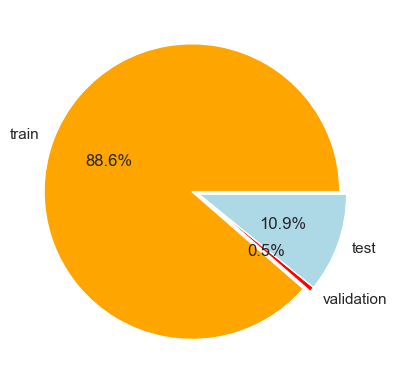

In [8]:
plt.pie([len(train), len(validation), len(test)],
        labels=['train', 'validation', 'test'], autopct='%.1f%%', colors=['orange', 'red', 'lightblue'], explode=(0.05, 0, 0))
plt.show()

# 3. Exploratory Data Analysis

#- check imbalance
#-  Selecting 9 random pictures from each directory


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

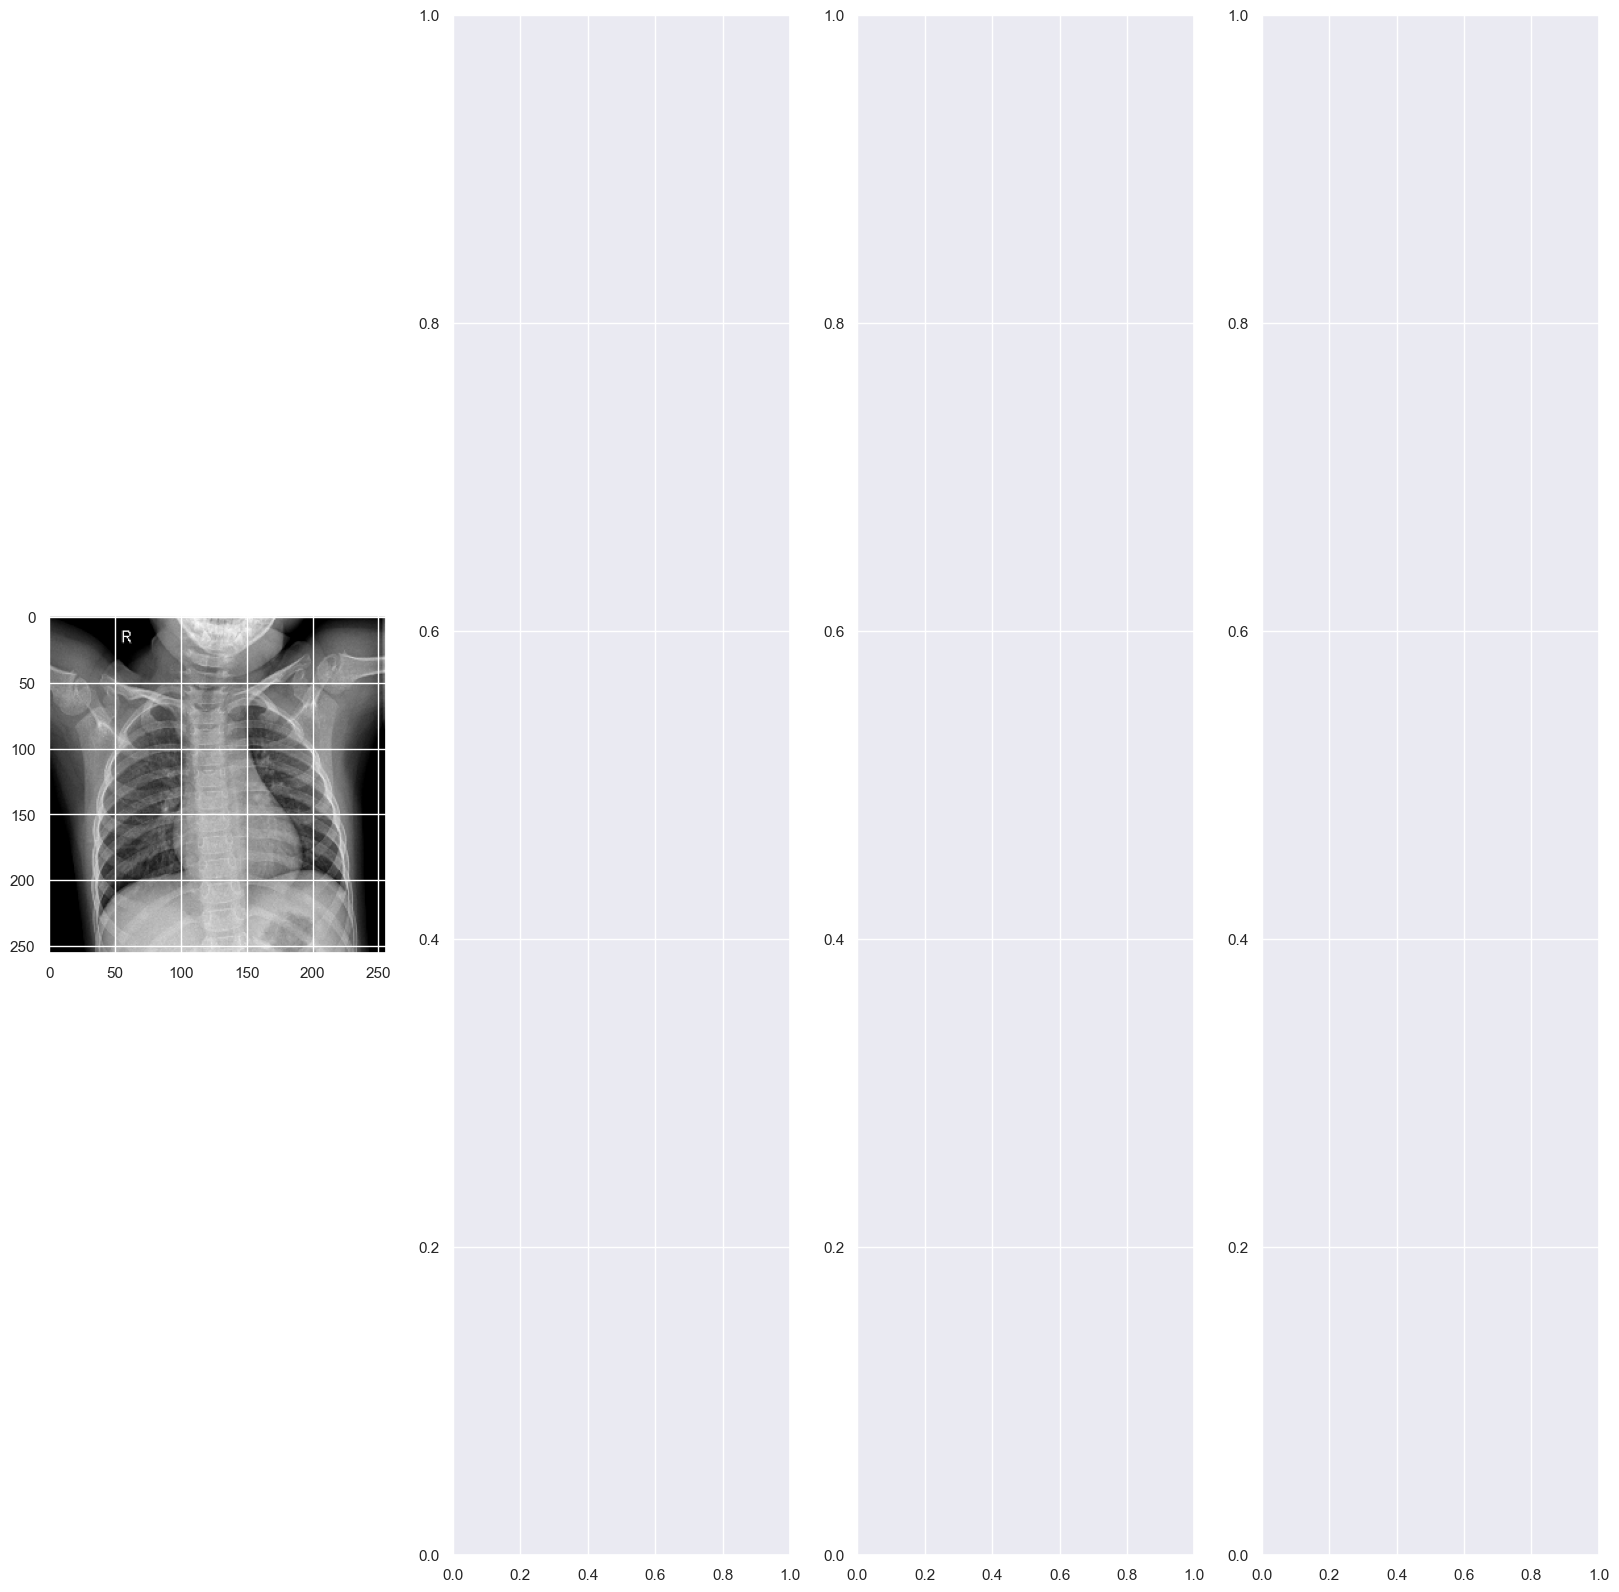

In [11]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Feature Engineering & Transformations


In [12]:
# Extracting Features and Labels
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())
    
for feature, label in validation:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

# Concatenate the lists to get the full 'x' and 'y' arrays
x_train = np.concatenate(x_train, axis=0)
x_val = np.concatenate(x_val, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_val = np.concatenate(y_val, axis=0)
y_test = np.concatenate(y_test, axis=0)

2024-05-15 15:07:42.966906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-15 15:07:48.892653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-15 15:07:49.030492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [13]:
# check the shapes of 'x_train' and 'y_train':
print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)
print("Shape of 'x_val':", x_val.shape)
print("Shape of 'y_val':", y_val.shape)
print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

Shape of 'x_train': (5216, 256, 256, 3)
Shape of 'y_train': (5216, 2)
Shape of 'x_val': (16, 256, 256, 3)
Shape of 'y_val': (16, 2)
Shape of 'x_test': (624, 256, 256, 3)
Shape of 'y_test': (624, 2)


In [14]:
# Pixel Value Scaling for Datasets: Normalizing and Standardizing the Data
x_train=x_train/256
x_val=x_val/256
x_test=x_test/256

# 5. Proposed Approaches (Model) with checks for overfitting/underfitting 

In [15]:
# We use transfer learning with VGG16 as the base model
def CNN_Model():
    base_model = VGG16(weights='imagenet', include_top = False, input_shape=(img_width, img_height, 3))
    # Freeze the base model
    for layer in base_model.layers:
        layer.trainable = False

    for i in range(3):
        base_model.layers[-2-i].trainable = True

    CNN = Sequential()
    CNN.add(Input(shape=(img_width, img_height,3)))
    CNN.add(base_model)
    CNN.add(Flatten())
    CNN.add(Dropout(0.3))
    CNN.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
    CNN.add(Dropout(0.2))
    CNN.add(Dense(2, activation='sigmoid'))
    
    return CNN

# Training The CNN
model = CNN_Model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()  

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,909,378 (72.13 MB)

 Trainable params: 11,274,114 (43.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [16]:
hist = model.fit(x_train, y_train, epochs= 6, validation_data= (x_val, y_val))
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")

Epoch 1/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 2632s 16s/step - accuracy: 0.7086 - loss: 3.0365 - val_accuracy: 0.6250 - val_loss: 2.3563
Epoch 2/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 2939s 18s/step - accuracy: 0.9439 - loss: 0.2362 - val_accuracy: 0.6250 - val_loss: 0.5183
Epoch 3/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 4792s 29s/step - accuracy: 0.9745 - loss: 0.1407 - val_accuracy: 0.9375 - val_loss: 0.3089
Epoch 4/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 3470s 21s/step - accuracy: 0.9789 - loss: 0.2042 - val_accuracy: 0.8125 - val_loss: 0.4566
Epoch 5/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 3336s 20s/step - accuracy: 0.9881 - loss: 0.0901 - val_accuracy: 0.8750 - val_loss: 0.4250
Epoch 6/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 4769s 29s/step - accuracy: 0.9862 - loss: 0.0890 - val_accuracy: 0.8750 - val_loss: 0.1935
{'accuracy': [0.7488496899604797, 0.9534125924110413, 0.9723926186561584, 0.9748849868774414, 0.9884969592094421, 0.987730085849762], 'loss': [1.2675691843032837, 0.19515790045261383, 0.19242043793201447, 0.1964429318904

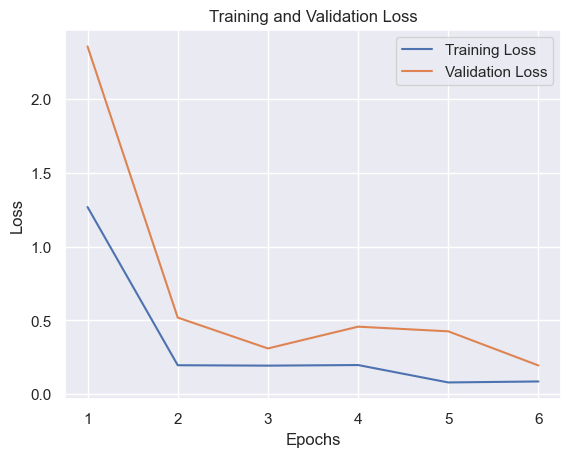

In [17]:
# Extract the training and validation loss values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

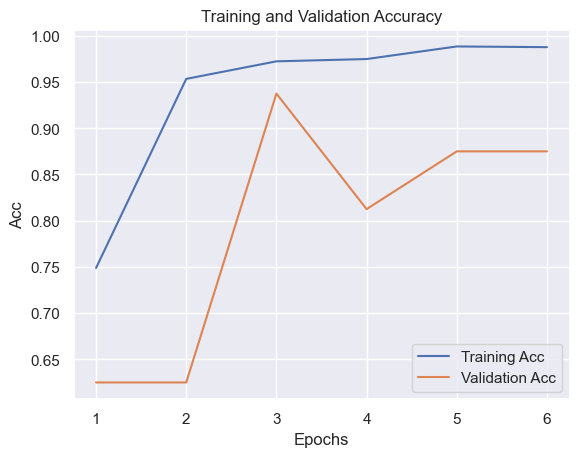

In [18]:
# Extract the training and validation loss values from the history object
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the loss graph
plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()


# 6.Proposed Solution (Model Selection) with regularization, if needed


# 7. Results (Accuracy) and Learnings from the methodology
# 8. Future Work